# Processing Baby Names Data by Year

This examples uses the baby names by year from the Social Security Administration, available at https://www.ssa.gov/oact/babynames/limits.html

The national data file was downloaded and placed in a babynames directory for use.  That directory contains files named yob####.txt where #### is the year of birth.  Each file is a comma-delimited list with name,sex,occurences.  Order is by occurences, sorted alphabetically on ties.



## Outline

1. Get list of file names to process
2. Read in a file into a dataframe
3. Add the year as a column to the dataframe
4. accumulate all files, each as a dataframe
5. merge the dataframes for opeartion

### Get input file listing

In [107]:
from pathlib import Path
p = Path('./babynames')
raw_list = [pfile for pfile in p.iterdir() if pfile.is_file()]
file_list = [i for i in raw_list if ('yob' in i.name)]

In [108]:
file_list[:5]

[WindowsPath('babynames/yob1880.txt'),
 WindowsPath('babynames/yob1881.txt'),
 WindowsPath('babynames/yob1882.txt'),
 WindowsPath('babynames/yob1883.txt'),
 WindowsPath('babynames/yob1884.txt')]

In [109]:
### Iterate through files reading them in

In [110]:
import pandas as pd
import numpy as np
df_list = []
header = ['name', 'sex', 'births']

In [111]:
for nfile in file_list:
    year = np.int(nfile.name.strip('.txt').strip('yob'))
    # Note assign here shortcuts a step.
    df_list.append(pd.read_csv(nfile, names=header).assign(yob=year))

In [112]:
df = pd.concat(df_list)

In [113]:
boys = df[df['sex']=='M']
girls = df[df['sex']=='F']

In [114]:
boy_names = boys.groupby('name').sum().sort_values('births', ascending=False)

In [115]:
boy_names = boy_names.reset_index().drop('yob', axis=1)

In [116]:
boy_names.head()

,name,births
0,James,5164280
1,John,5124817
2,Robert,4820129
3,Michael,4362731
4,William,4117369


In [117]:
just_aaron = boys[boys['name']=='Aaron']

In [118]:
just_aaron

,name,sex,births,yob
1072,Aaron,M,102,1880
1064,Aaron,M,94,1881
1188,Aaron,M,85,1882
1174,Aaron,M,105,1883
1313,Aaron,M,97,1884
...,...,...,...,...
19240,Aaron,M,7392,2014
19142,Aaron,M,7159,2015
18884,Aaron,M,7157,2016
18421,Aaron,M,7196,2017


In [119]:
just_aaron = just_aaron.set_index(just_aaron['yob']).drop(['name', 'sex', 'yob'], axis=1)

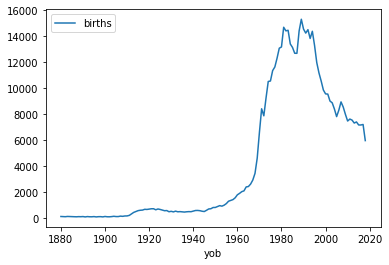

In [120]:
just_aaron.plot()

In [121]:
year_totals = boys.groupby('yob').sum()

In [122]:
year_totals

,births
yob,
1880,110490
1881,100743
1882,113686
1883,104625
1884,114442
...,...
2014,1916564
2015,1911537
2016,1891585


In [123]:
just_aaron['percent'] = just_aaron['births'].values.reshape((139,1))/year_totals.values

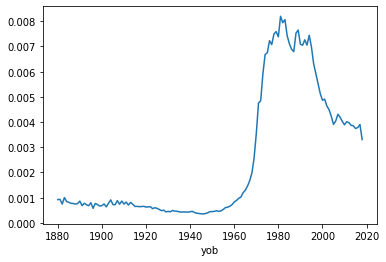

In [124]:
just_aaron['percent'].plot()

In [125]:
just_aaron.loc[1979]

births     13077.000000
percent        0.007593
Name: 1979, dtype: float64

In [126]:
just_aaron.loc[1977:1982]

,births,percent
yob,,
1977,11632,0.007076
1978,12309,0.007494
1979,13077,0.007593
1980,13173,0.007382
1981,14692,0.008201
1982,14415,0.007943


### The Great Hillary Drop

In [127]:
just_hill = girls[girls['name']=='Hillary']

In [128]:
just_hill = just_hill.set_index(just_hill['yob']).drop(['name', 'sex', 'yob'], axis=1)

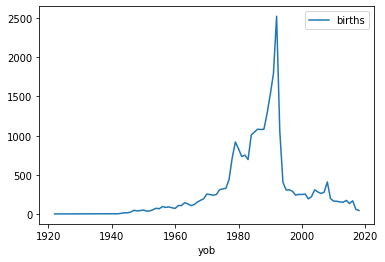

In [129]:
just_hill.plot()

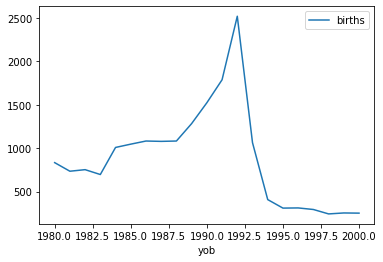

In [130]:
just_hill.loc[1980:2000].plot()